In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
from sklearn import tree

### Importing the dataset

In [3]:
df = pd.read_csv('/home/code_wizard/coding_files/data_science/data-science/Decision Tree and Random Forest Dataset/Social_Network_Ads.csv')

df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


### Splitting the dataset

In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)



### Preprocessing

##### fit_transform: 'fit' calculates mean and std deviation for each feature.
##### 'transform' : Subtract mean and divide by std for each feature scaling the data around 0 and 1.
##### for x_test we apply only transfrom beacuse scaler is already fitted for the training data

In [5]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)




### Training the model

In [6]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=1)

z=classifier.fit(x_train,y_train)

#### Predicting new result

In [7]:
result = classifier.predict(sc.transform([[30,87000]]))

print(result)

[0]


### Predicting Test results

In [8]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0]


In [9]:
np.concatenate(((y_pred.reshape(len(y_pred),1)),y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0,

### Metrices

In [10]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

score = accuracy_score(y_test,y_pred)
print(score)

[[49  9]
 [ 7 35]]
0.84


[Text(0.5482142857142858, 0.9642857142857143, 'x[0] <= 0.722\nentropy = 0.922\nsamples = 300\nvalue = [199, 101]'),
 Text(0.3, 0.8928571428571429, 'x[1] <= 0.608\nentropy = 0.645\nsamples = 225\nvalue = [188, 37]'),
 Text(0.4241071428571429, 0.9285714285714286, 'True  '),
 Text(0.14285714285714285, 0.8214285714285714, 'x[0] <= -0.062\nentropy = 0.177\nsamples = 188\nvalue = [183, 5]'),
 Text(0.11428571428571428, 0.75, 'entropy = 0.0\nsamples = 124\nvalue = [124, 0]'),
 Text(0.17142857142857143, 0.75, 'x[1] <= -0.044\nentropy = 0.396\nsamples = 64\nvalue = [59, 5]'),
 Text(0.14285714285714285, 0.6785714285714286, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.2, 0.6785714285714286, 'x[1] <= 0.045\nentropy = 0.65\nsamples = 30\nvalue = [25, 5]'),
 Text(0.17142857142857143, 0.6071428571428571, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.22857142857142856, 0.6071428571428571, 'x[1] <= 0.43\nentropy = 0.579\nsamples = 29\nvalue = [25, 4]'),
 Text(0.2, 0.5357142857142857

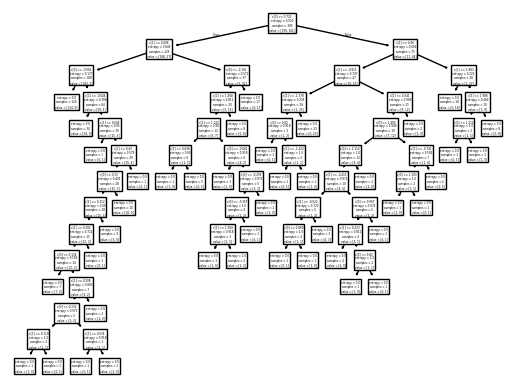

In [14]:
tree.plot_tree(z)